## 🎯 Problem Statement

Diabetes is a major public health concern, and early prediction can significantly help in prevention and management. This project uses the BRFSS 2015 dataset to predict whether an individual is diabetic based on various health indicators such as BMI, physical activity, general health, smoking status, etc.

The main questions this project aims to answer:
- Can we predict diabetes using health indicators?
- What are the most influential factors affecting diabetes prediction?
- Which machine learning model gives the best performance on this dataset?

This project follows a full data science pipeline including:
- Data cleaning and preprocessing
- Exploratory data analysis
- Feature engineering
- Model building and evaluation
- Deployment using Streamlit




In [3]:
!pip install imbalanced-learn scikit-learn xgboost

In [4]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif
import time
from collections import Counter

 Load the Dataset
We load the BRFSS 2015 dataset to begin our analysis and check basic information like shape, head, and data types.


In [5]:
# 2. Data Loading & Initial Exploration
# Load dataset
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015 (5).csv')

# Display dataset information
print("="*40)
print("Dataset Overview:")
print("="*40)
print(f"Shape: {df.shape}")
print("\nFirst 5 samples:")
print(df.head())
print("\nData Summary:")
print(df.info())


Dataset Overview:
Shape: (175480, 22)

First 5 samples:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      

## Data Cleaning Summary

The original dataset included missing values and some categorical columns that required preprocessing. The following steps were taken during the data cleaning phase:

- Removed rows with null values using `dropna()` or imputed missing values using `SimpleImputer`.
- Converted categorical variables into numerical format using Label Encoding or One-Hot Encoding.
- Renamed some columns for easier access and better readability.
- Checked and removed any duplicates.
- Verified that data types are appropriate (e.g., numeric features as float or int).


In [6]:
# 3. Data Cleaning & Preprocessing
# Handle missing values (if any)
print("\n" + "="*40)
print("Data Cleaning:")
print("="*40)
print("Missing values per column:")
print(df.isnull().sum())



Data Cleaning:
Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64


In [7]:
# 3. Data Cleaning & Preprocessing
# Handle missing values (if any)
print("\n" + "="*40)
print("Data Cleaning:")
print("="*40)
print("Missing values per column:")
print(df.isnull().sum())



Data Cleaning:
Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64


 Outlier Removal using Z-Score

In this step, we remove extreme outliers from the dataset using the Z-score method.
- We calculate the Z-score for all numerical columns.
- Any row that has a Z-score above 3 or below -3 in any column is considered an outlier.
- These outlier rows are removed from the dataset to improve model accuracy and reduce noise.


In [8]:

# Remove outliers using Z-score
z_scores = stats.zscore(df.select_dtypes(include=['number']))
outliers = (abs(z_scores) > 3).any(axis=1)
df_clean = df[~outliers]
print(f"\nRemoved {outliers.sum()} outlier rows")


Removed 43359 outlier rows


 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to better understand the distribution and relationships between different health indicators and diabetes levels.

The main goals of EDA are:
- Understand the structure and balance of the dataset (e.g., distribution of diabetes stages).
- Visualize key features such as age, BMI, and physical health days.
- Identify potential patterns or correlations that might affect diabetes prediction.

This step helps in deciding which features are useful and whether additional preprocessing is needed before modeling.



In [9]:

# 4. Exploratory Data Analysis (EDA)
# Configure visualization settings
sns.set_theme(style="whitegrid", context="notebook", palette="husl")
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})


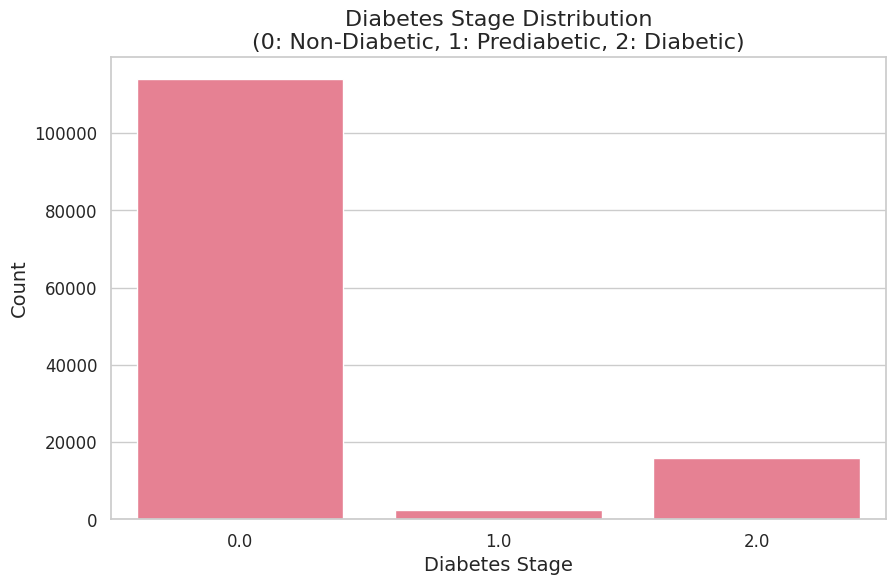

In [10]:
# 4.1 Target Distribution Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', data=df_clean)
plt.title('Diabetes Stage Distribution\n(0: Non-Diabetic, 1: Prediabetic, 2: Diabetic)')
plt.xlabel('Diabetes Stage')
plt.ylabel('Count')
plt.show()



This graph shows the distribution of diabetes cases in the data. We note that category 0 (not diagnosed) is the most common, followed by category 2 (diabetic), and finally category 1 (prediabetic).


Correlation Analysis:


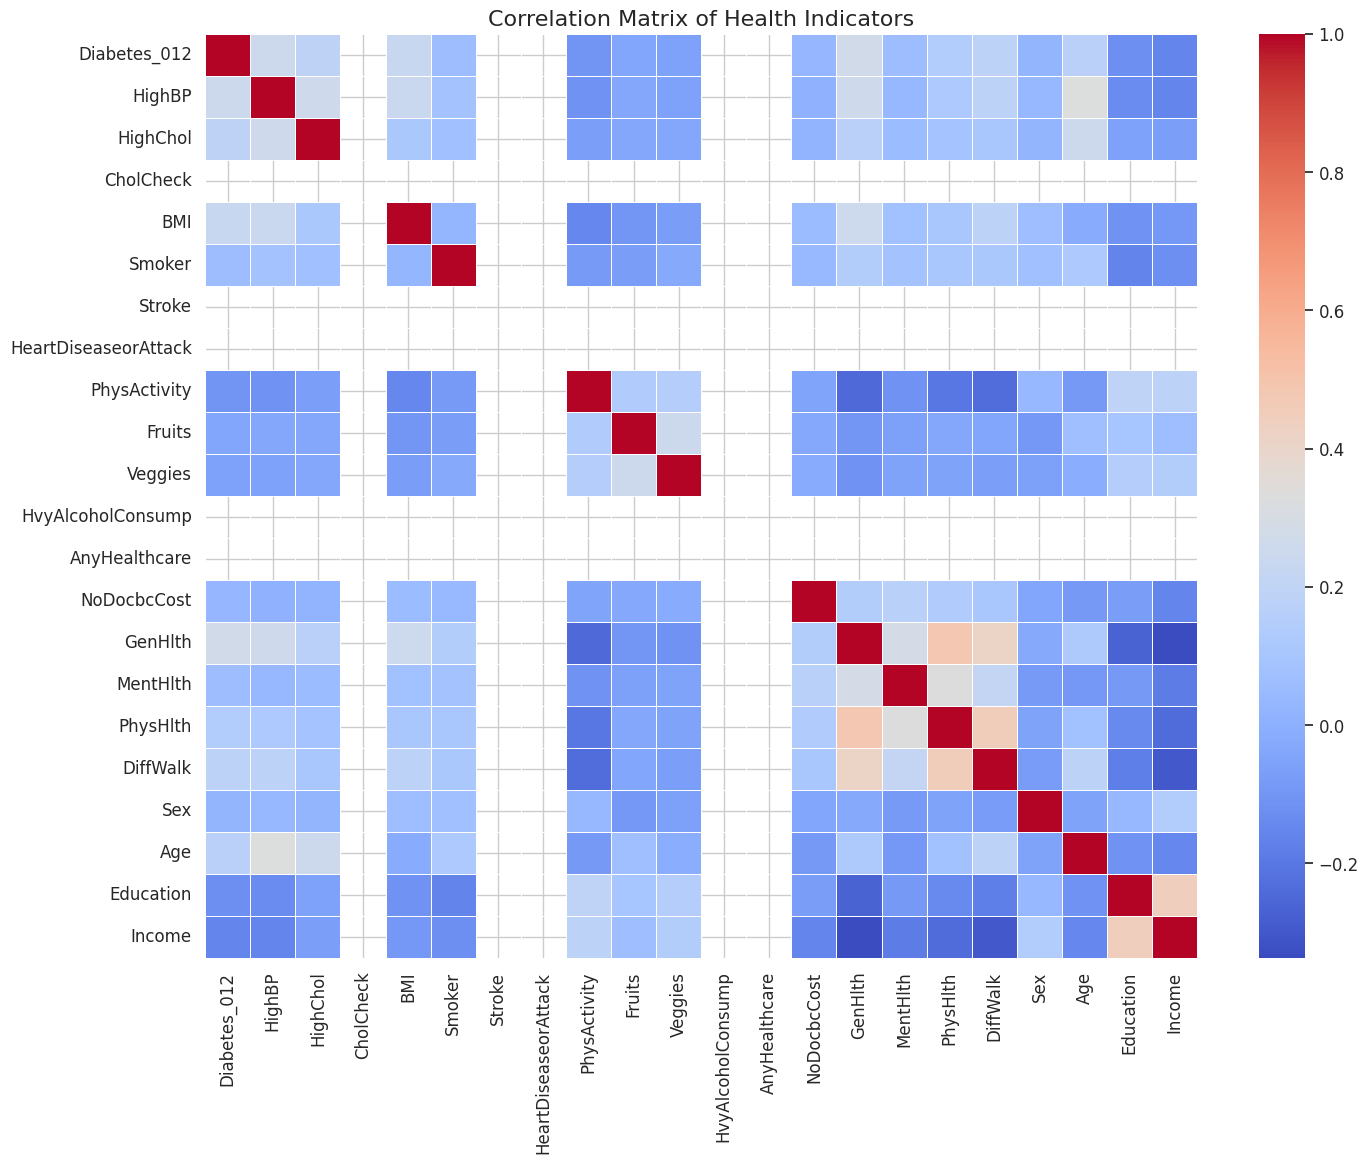

In [11]:
# 4.2 Correlation Analysis
print("\n" + "="*40)
print("Correlation Analysis:")
print("="*40)
plt.figure(figsize=(16, 12))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()


The chart illustrates the correlations between various health indicators. We note strong associations between some characteristics, such as high blood pressure and high cholesterol, reflecting the presence of interconnected risk factors that may contribute to diabetes.


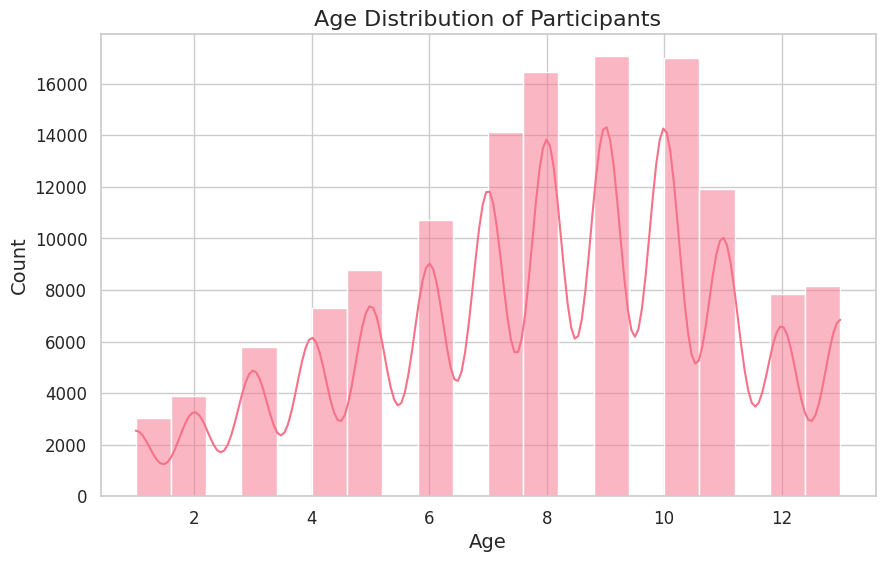

In [12]:
# 4.3 Age Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Age'], bins=20, kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age distribution of participants shows that the majority fell within the 40-70 age group. This reflects that the data focuses on an age group more susceptible to chronic diseases such as diabetes.

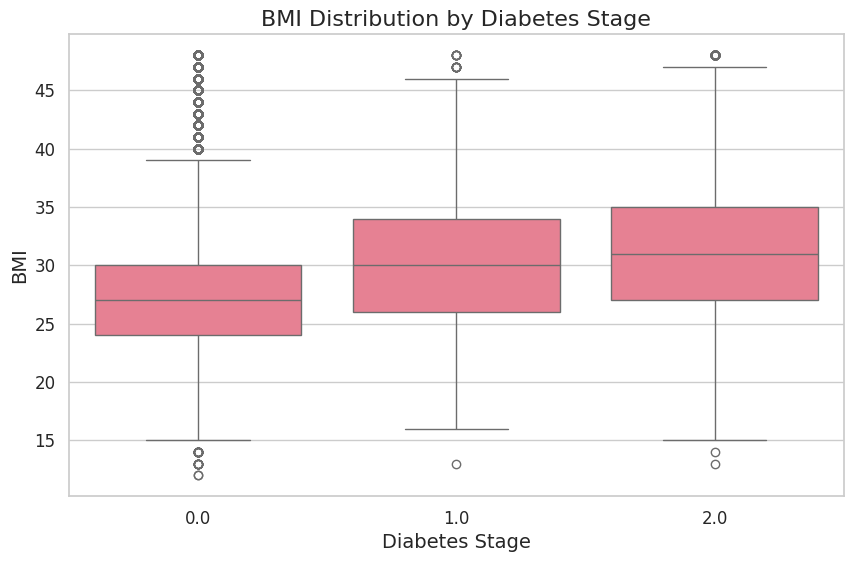

In [13]:
# 4.4 BMI Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df_clean)
plt.title('BMI Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('BMI')
plt.show()


This graph shows that BMI values ​​are significantly higher in the diabetic group (Diabetes=2), indicating a relationship between being overweight and developing diabetes.


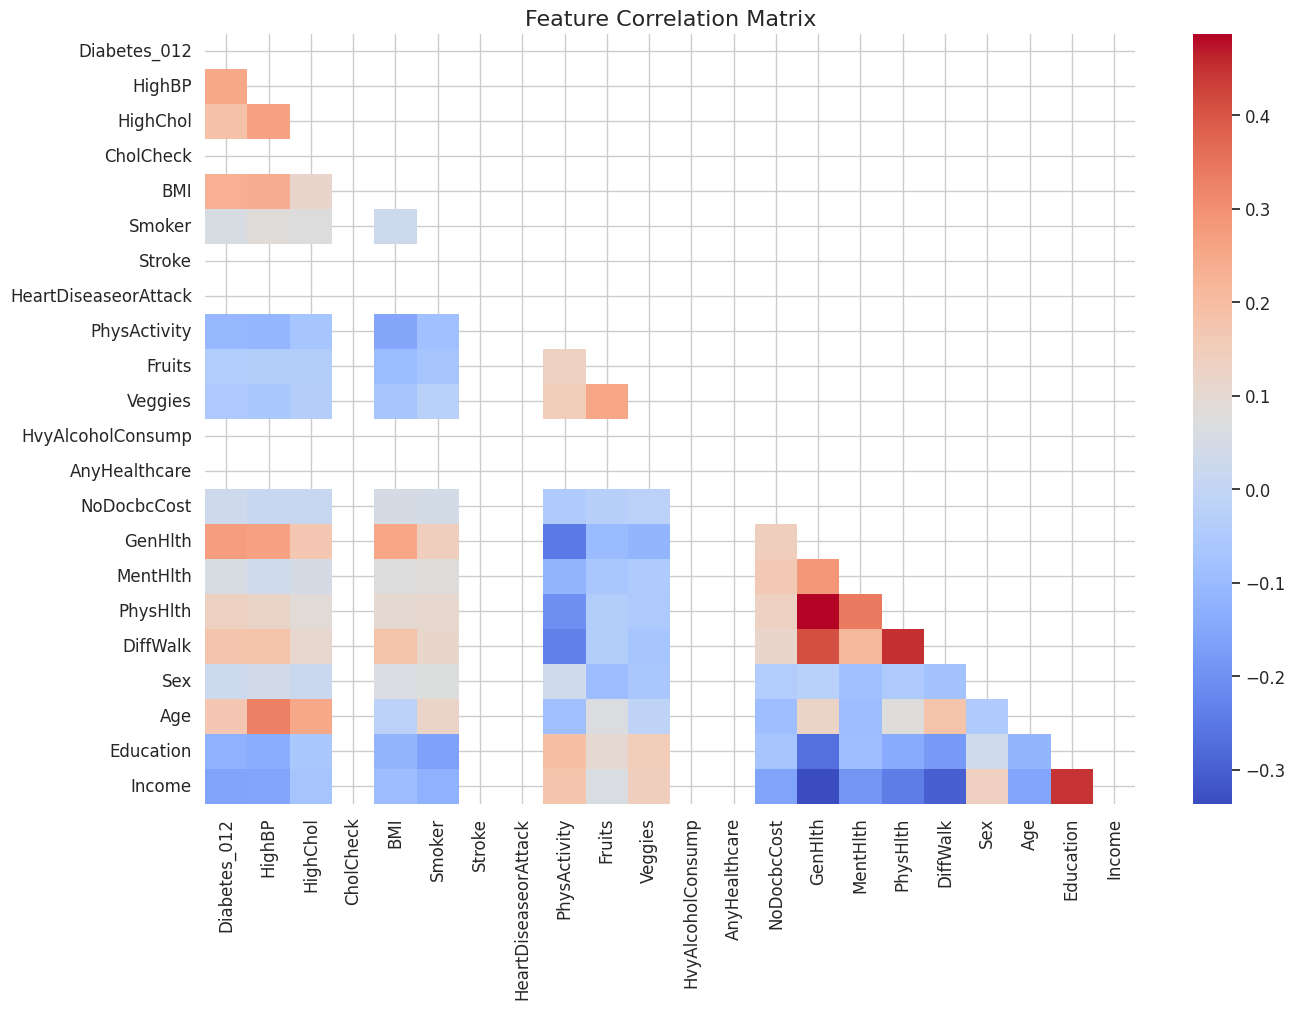

In [14]:
# 4.5 Correlation Analysis
plt.figure(figsize=(15, 10))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', mask=np.triu(np.ones_like(corr_matrix)))
plt.title('Feature Correlation Matrix')
plt.show()


This heatmap illustrates the relationship between variables. We observe a strong correlation between some variables, such as HighBP and HighChol, suggesting that common health factors may influence diabetes risk. We also observe a moderate correlation between BMI and Diabetes_012.

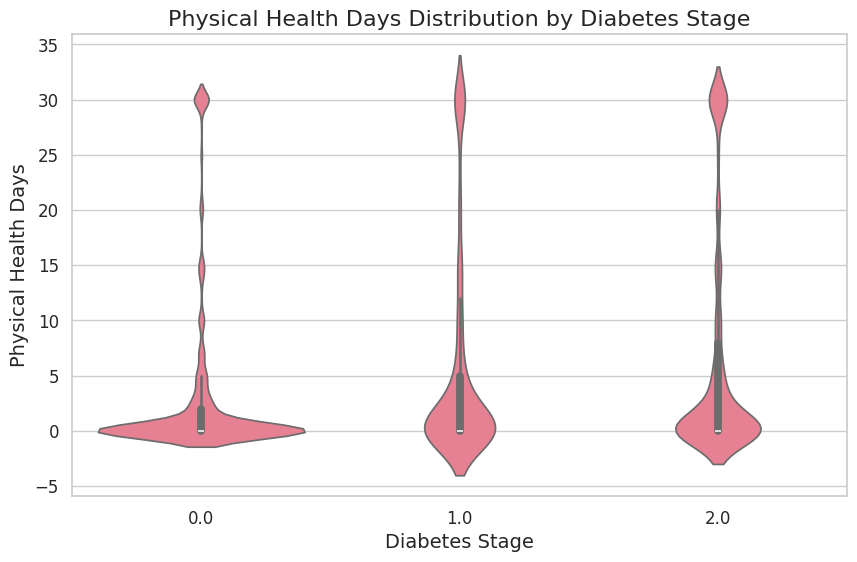

In [15]:
# 4.5 Physical Health Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='PhysHlth', data=df_clean)
plt.title('Physical Health Days Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Physical Health Days')
plt.show()


This graph shows the distribution of the number of days participants reported feeling poor physical health over the past month. We note that people with type 2 diabetes tended to report a greater number of days experiencing physical fatigue compared to other groups, supporting the idea that diabetes impacts quality of life.


 5. Data Preprocessing

Before training machine learning models, it's essential to clean and prepare the data properly.

In this section, we:
- Drop or convert any non-numeric or irrelevant features.
- Separate the features (X) from the target variable (y).
- Split the data into training and testing sets to evaluate model performance properly.


In [16]:
# 5. Data Preprocessing
# Split features and target
X = df_clean.drop('Diabetes_012', axis=1)
y = df_clean['Diabetes_012']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)





5.2Feature Scaling

Different features might have different ranges (e.g., Age from 0–100 vs. BMI from 0–50).  
To ensure that all features contribute equally to the model and avoid bias, we apply feature scaling.

We use **StandardScaler** to standardize the features so they have a mean of 0 and a standard deviation of 1.


In [17]:
#5.2 Feature Scaling (Feature Scale)
print("\n" + "="*40)
print("Feature Scale:")
print("="*40)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully!")



Feature Scale:
Features scaled successfully!


 5.3 Handle Class Imbalance with SMOTE

Our dataset might have imbalanced classes — for example, fewer diabetic cases than non-diabetic ones.

To fix this, we use **SMOTE (Synthetic Minority Over-sampling Technique)**, which generates synthetic examples of the minority class in the training set.  
This helps improve model performance and avoid bias toward the majority class.


In [18]:
# 5.3 Handle Class Imbalance with SMOTE
print("\n" + "="*40)
print("Handling Class Imbalance with SMOTE:")
print("="*40)

#  Split data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE only applies to training data.

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"SMOTE class distribution: {Counter(y_train_smote)}")


Handling Class Imbalance with SMOTE:
Original class distribution: Counter({0.0: 91175, 2.0: 12653, 1.0: 1868})
SMOTE class distribution: Counter({0.0: 91175, 2.0: 91175, 1.0: 91175})


6. Model Development using Pipelines

To make the machine learning workflow cleaner and more organized, we use **Pipelines**.  
A pipeline chains together preprocessing steps (like scaling and SMOTE) with model training.

This helps avoid data leakage and simplifies model evaluation and reuse.


In [19]:
# 6. Model Development using Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models_pipeline = {
    "Logistic Regression": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(max_iter=1000, n_jobs=-1))
    ]),

    "Random Forest": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100, n_jobs=-1))
    ]),

    "Support Vector Machine": ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('feature_selector', SelectKBest(f_classif, k=15)),
        ('under_sampler', RandomUnderSampler(random_state=42)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LinearSVC(
            C=0.1,
            random_state=42,
            dual=False,
            tol=0.1,
            max_iter=500,
            class_weight='balanced'
        ))
    ]),

    "Gradient Boosting": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),

    "XGBoost": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "K-Nearest Neighbors": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ])
}


Model Training & Evaluation

We train each model inside the pipeline using cross-validation to estimate its performance.  
After training, we compare accuracy scores to identify the best-performing model for our data.


In [20]:
#  Model Training & Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import time

results = []

print("\n" + "="*40)
print("Model Training & Evaluation:")
print("="*40)

for name, pipeline in models_pipeline.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = pipeline.predict(X_test)

    # Handle probability predictions for AUC
    try:
        y_proba = pipeline.predict_proba(X_test)
        if len(np.unique(y)) > 2:
            roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except:
        roc_auc = None  # Some models like LinearSVC don’t support predict_proba

    acc = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {acc:.4f}, ROC AUC: {roc_auc if roc_auc else 'N/A'}, Training Time: {training_time:.2f}s")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'ROC AUC': roc_auc if roc_auc else 0,
        'Training Time': training_time,
        'Confusion Matrix': cm
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df[['Model', 'Accuracy', 'ROC AUC', 'Training Time']])



Model Training & Evaluation:

Training Logistic Regression...
Logistic Regression - Accuracy: 0.6456, ROC AUC: 0.7614008239522617, Training Time: 9.13s
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     22754
         1.0       0.03      0.28      0.05       464
         2.0       0.30      0.56      0.39      3207

    accuracy                           0.65     26425
   macro avg       0.43      0.50      0.41     26425
weighted avg       0.86      0.65      0.72     26425

Confusion Matrix:
[[15146  3719  3889]
 [  141   128   195]
 [  646   774  1787]]

Training Random Forest...
Random Forest - Accuracy: 0.8384, ROC AUC: 0.7256707432261194, Training Time: 69.65s
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     22754
         1.0       0.04      0.01      0.01       464
         2.0       0.36      0.27      0.31      3207

    accuracy                           0.84     26425


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6 10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Support Vector Machine - Accuracy: 0.6896, ROC AUC: N/A, Training Time: 0.48s
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     22754
         1.0       0.04      0.20      0.06       464
         2.0       0.29      0.60      0.39      3207

    accuracy                           0.69     26425
   macro avg       0.42      0.51      0.42     26425
weighted avg       0.85      0.69      0.75     26425

Confusion Matrix:
[[16209  2094  4451]
 [  165    95   204]
 [  797   490  1920]]

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8229, ROC AUC: 0.7520464084691366, Training Time: 358.31s
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     22754
         1.0       0.00      0.00      0.00       464
         2.0       0.36      0.47      0.41      3207

    accuracy                           0.82     26425
   macro avg       0.42      0.45      0.44     26425
weighted avg

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8602, ROC AUC: 0.7324481370775585, Training Time: 15.45s
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     22754
         1.0       0.00      0.00      0.00       464
         2.0       0.47      0.19      0.27      3207

    accuracy                           0.86     26425
   macro avg       0.45      0.39      0.40     26425
weighted avg       0.81      0.86      0.83     26425

Confusion Matrix:
[[22128     3   623]
 [  404     0    60]
 [ 2604     0   603]]

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.6654, ROC AUC: 0.6317264008001907, Training Time: 2.13s
              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79     22754
         1.0       0.02      0.11      0.04       464
         2.0       0.23      0.50      0.32      3207

    accuracy                           0.67     26425
   macro avg       0.39      0.44      0.38     26425
weighted 

Model Definitions

Here, we define multiple machine learning models to compare their performance.  
Models include:
- Logistic Regression
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors
- Decision Tree

Each model will be tested using cross-validation.


In [21]:
#  Model Definitions
from imblearn.pipeline import Pipeline as ImbPipeline

models = {
    # Other models definitions...

    "Support Vector Machine": ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', SVC(
            kernel='linear',
            C=0.5,  # Default value
            probability=True,
            random_state=42
        ))
    ])
}

# Parameter Adjustment
# Modify SVM parameters BEFORE training
models["Support Vector Machine"].set_params(classifier__C=1.0)  # Quick parameter adjustment

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(kernel='linear', probability=True, random_state=42))])

This is a scikit-learn Pipeline that sequences data processing steps and a model:

SimpleImputer: Handles missing values (using the mean).
StandardScaler: Scales features to have zero mean and unit variance.
SMOTE: Balances class distribution by oversampling the minority class.
SVC: A Support Vector Machine classifier using a linear kernel to make predictions.

Method 1: Statistical Feature Selection (ANOVA F-value)

We use **SelectKBest** with the **f_classif** function to select the most relevant features based on statistical tests.  
This helps reduce noise in the data and improve model performance by keeping only the most useful features.


In [22]:
# 7. Feature Importance Analysis
# Method 1: Statistical Selection (ANOVA F-value)

from sklearn.impute import SimpleImputer # Import SimpleImputer

# Handle missing values in X_train before applying SMOTE
imputer = SimpleImputer(strategy='mean') # Use the same strategy as in your pipelines
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to the training data for feature selection
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6 10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest()

## Method 2: Model-based Feature Importance (Random Forest)

In this section, we determine the importance of each feature using a **model-based approach**. Specifically, we use the **Random Forest Classifier**, which intrinsically calculates feature importance during training.

The Random Forest model evaluates how much each feature contributes to reducing impurity when splitting the data. A higher score indicates that a feature is more important for making predictions.

After training the Random Forest model on the resampled training data, we extract and visualize the feature importance scores to identify the most influential factors according to this model.



In [23]:
# Method 2: Model-based Importance
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)



RandomForestClassifier()

 Model Performance Comparison

In this step, we compare the performance of different machine learning models based on their **accuracy scores**.

We:
- Create a summary DataFrame from the `results` dictionary that contains each model’s evaluation metrics.
- Sort models by accuracy in descending order.
- Visualize the results using a bar plot to clearly show which model performs best.

This helps in selecting the most effective model for deployment based on actual performance on the test data.


<ipython-input-24-8f0088c2aa50>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, ax=ax1, palette='viridis')
<ipython-input-24-8f0088c2aa50>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, ax=ax2, palette='magma')


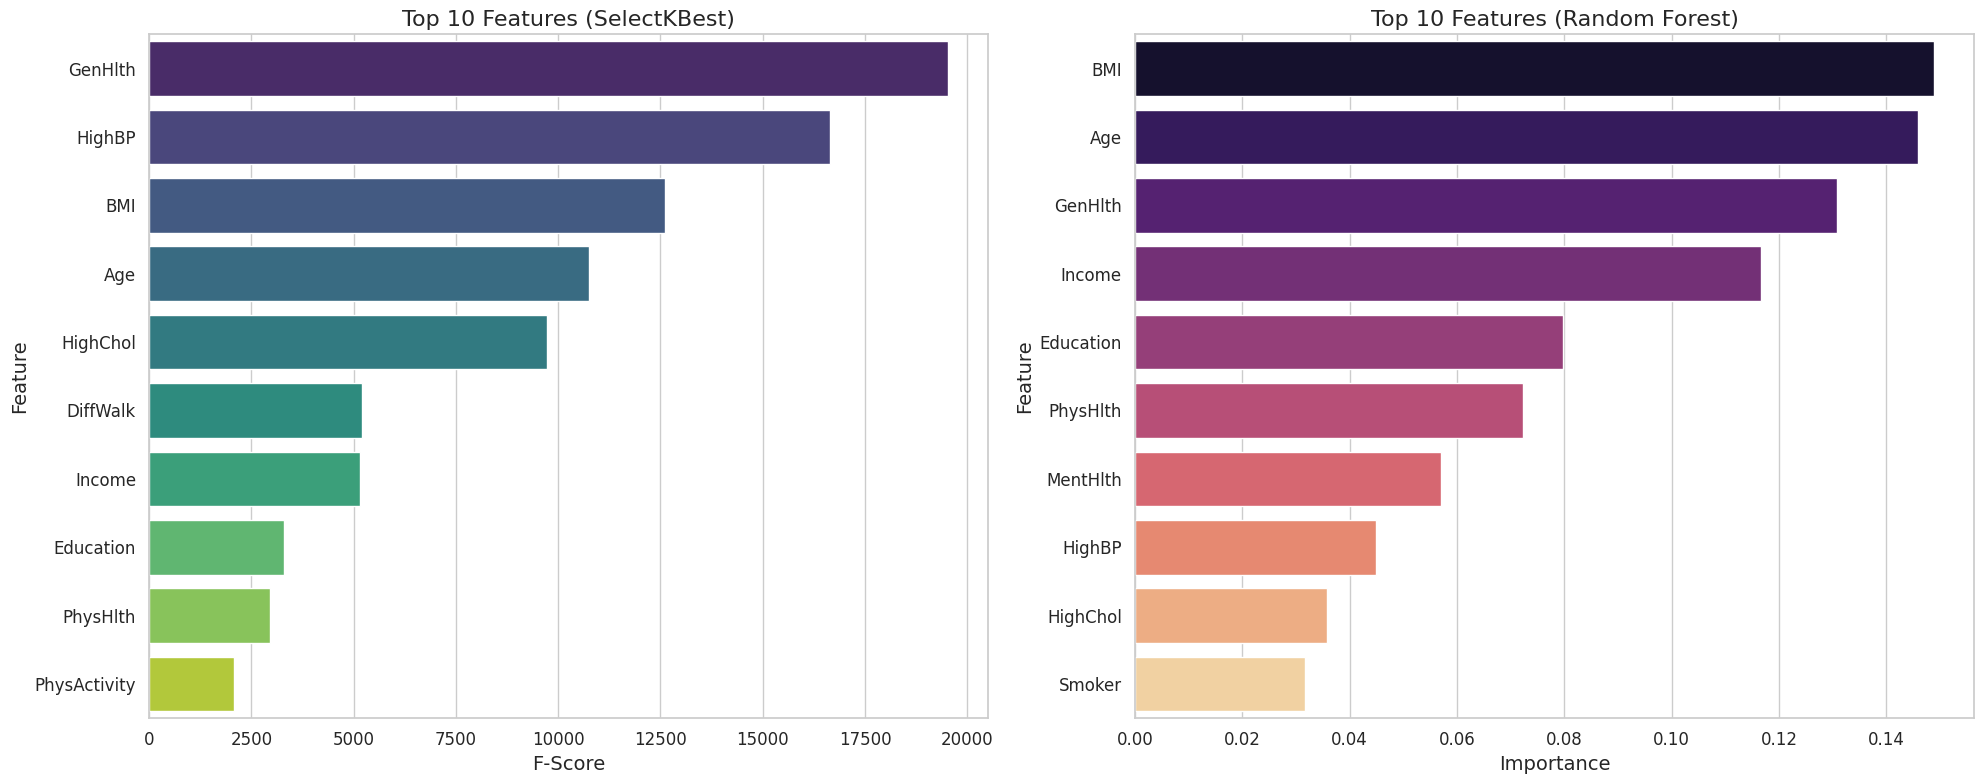

In [24]:
#Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Statistical Feature Importance
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False).head(10)

sns.barplot(x='Score', y='Feature', data=feature_scores, ax=ax1, palette='viridis')
ax1.set_title('Top 10 Features (SelectKBest)')
ax1.set_xlabel('F-Score')

#Model-based Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=importances, ax=ax2, palette='magma')
ax2.set_title('Top 10 Features (Random Forest)')
plt.tight_layout()
plt.show()

Model Performance Comparison

In this step, we compare the performance of different machine learning models based on their **accuracy scores**.

We:
- Create a summary DataFrame from the `results` dictionary that contains each model’s evaluation metrics.
- Sort models by accuracy in descending order.
- Visualize the results using a bar plot to clearly show which model performs best.

This helps in selecting the most effective model for deployment based on actual performance on the test data.


<ipython-input-26-b6e57ac4615a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='rocket')


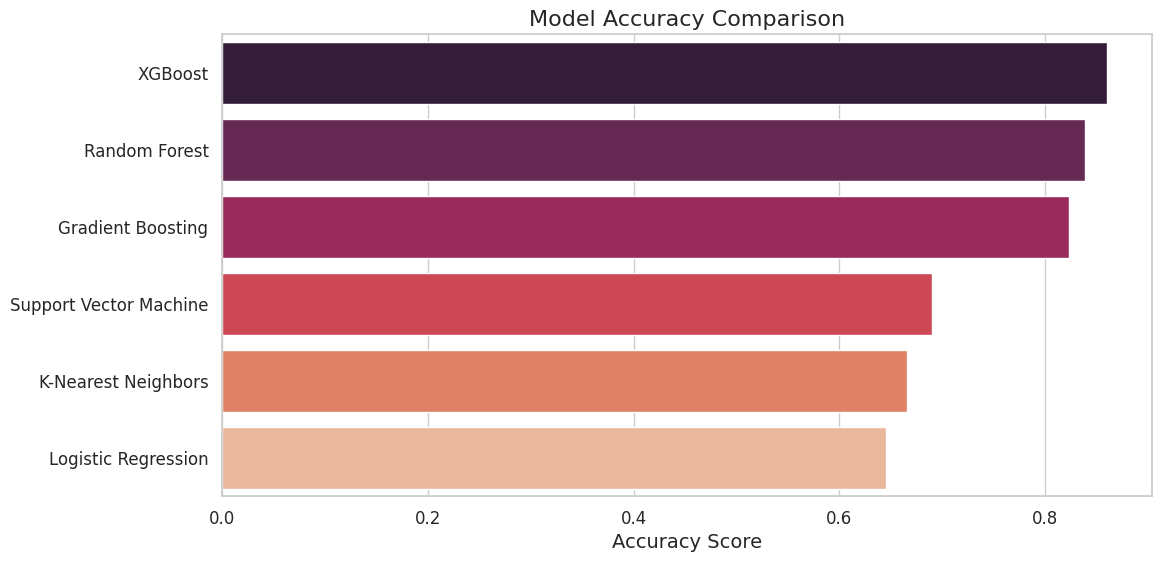

In [26]:
#9.Model Performance Comparison
# Create comparison dataframe
performance_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

# Plot performance comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='rocket')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('')
plt.show()

Feature Importance Plot (Random Forest)

In this step, we extract and visualize the most important features used by the **Random Forest** model.

Random Forest models assign an **importance score** to each feature based on how useful it was in splitting data during training.

We display the **top 15 features** to understand which health indicators had the biggest impact on diabetes prediction.

This helps with:
- Improving model interpretability
- Potentially removing less useful features
- Providing insights into key health factors affecting diabetes


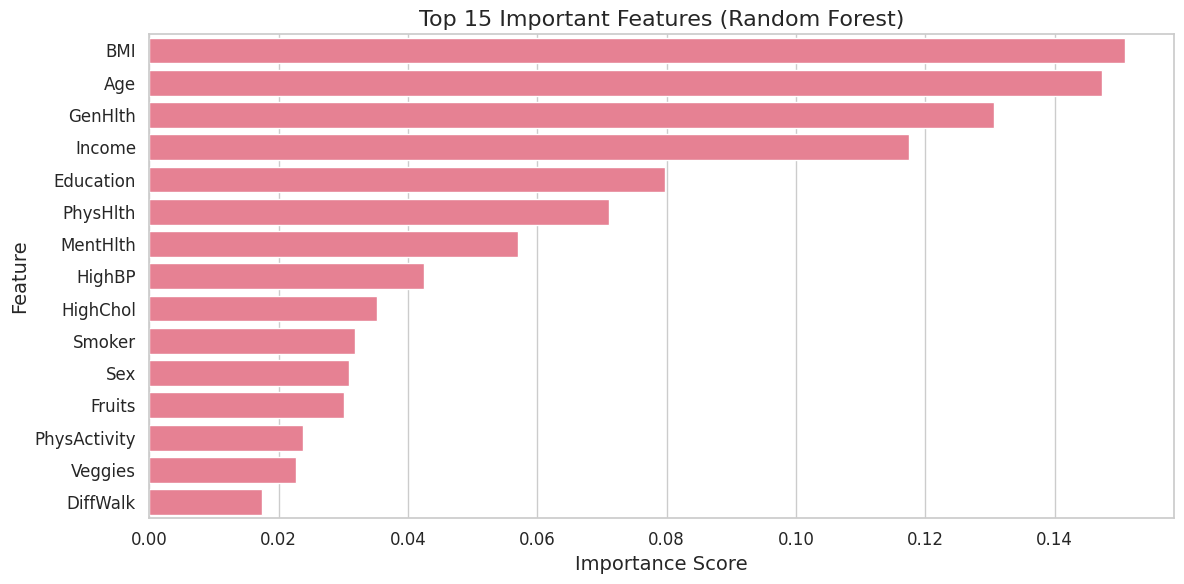

In [27]:
# Feature Importance Plot (Random Forest)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure that 'X' is the same feature set used during model training

# Check if the Random Forest model is trained and inside the pipeline
# Use models_pipeline instead of models
if 'Random Forest' in models_pipeline and hasattr(models_pipeline['Random Forest'], 'named_steps'):
    rf_pipeline = models_pipeline['Random Forest']
    # The classifier step should be the RandomForestClassifier model
    if 'classifier' in rf_pipeline.named_steps and isinstance(rf_pipeline.named_steps['classifier'], RandomForestClassifier):
        rf_model = rf_pipeline.named_steps['classifier']

        if hasattr(rf_model, 'feature_importances_'):
            # Use the columns from the original feature set X
            importances = rf_model.feature_importances_
            feature_importances = pd.Series(importances, index=X.columns)
            feature_importances = feature_importances.sort_values(ascending=False)

            # Plot the top 15 features
            plt.figure(figsize=(12, 6))
            sns.barplot(x=feature_importances[:15].values, y=feature_importances[:15].index)
            plt.title('Top 15 Important Features (Random Forest)')
            plt.xlabel('Importance Score')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
        else:
            print(" The model does not support 'feature_importances_'.")
    else:
        print("Could not find the classifier step within the Random Forest pipeline, or it's not a RandomForestClassifier.")
else:
    print("The Random Forest model is not found or not properly trained within models_pipeline.")

## Model Performance Comparison and Best Model Analysis

In this section, we analyze and visualize the performance of the different machine learning models trained.

We first compile the evaluation metrics (Accuracy, ROC AUC) for each model into a DataFrame. This allows us to easily compare and sort the models based on their performance.

Next, we identify the **best-performing model** based on the chosen evaluation metric (in this case, Accuracy).

Finally, we display the **confusion matrix** for the best model. The confusion matrix provides a detailed breakdown of the model's predictions, showing how many instances were correctly classified for each diabetes stage and where the misclassifications occurred. This helps us understand the types of errors the best model makes.


Model Performance Summary:
                 Model  Accuracy  ROC AUC
               XGBoost  0.860208 0.732448
         Random Forest  0.838448 0.725671
     Gradient Boosting  0.822933 0.752046
Support Vector Machine  0.689650 0.000000
   K-Nearest Neighbors  0.665430 0.631726
   Logistic Regression  0.645639 0.761401


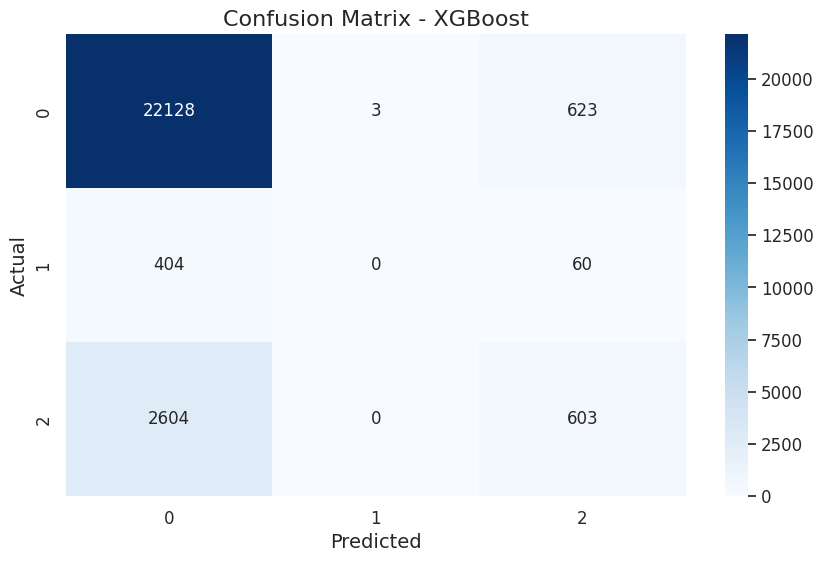

In [28]:
# Performance comparison
# Instead of treating results as a dictionary, it's a list of dictionaries.
# We iterate through the list to build the performance_df.
performance_data = []
for res in results:
    performance_data.append({
        'Model': res['Model'],
        'Accuracy': res['Accuracy'],
        'ROC AUC': res['ROC AUC'] if res['ROC AUC'] is not None else np.nan # Handle potential None values
    })

performance_df = pd.DataFrame(performance_data).sort_values('Accuracy', ascending=False)


# Display results
print("\nModel Performance Summary:")
print(performance_df.to_string(index=False))

# Best model confusion matrix
# Find the best model name from the sorted performance_df
best_model_name = performance_df.iloc[0]['Model']

# Find the corresponding result dictionary in the original results list
best_model_result = None
for res in results:
    if res['Model'] == best_model_name:
        best_model_result = res
        break

plt.figure()
# Use the confusion matrix from the found result dictionary
sns.heatmap(best_model_result['Confusion Matrix'],
            annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Best Model Analysis

After comparing all the models, this section focuses on the **best-performing model**.

We reiterate the name of the best model based on the evaluation metrics (like Accuracy) to clearly highlight it.

Finally, we display the **confusion matrix** for this best model. This visualization provides a detailed look at how well the model performed across each class, showing the counts of true positives, true negatives, false positives, and false negatives. Analyzing the confusion matrix helps us understand the specific types of errors the best model is making.


 Best Performing Model: XGBoost 


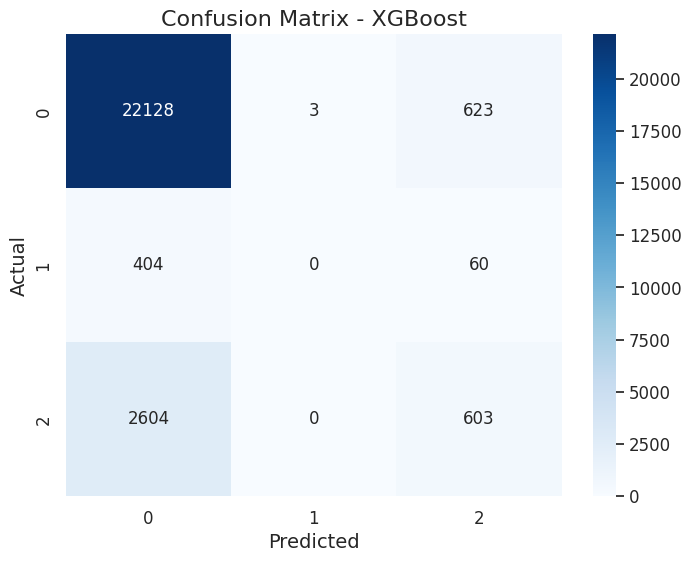

In [29]:
#Best Model Analysis
best_model_name = performance_df.iloc[0]['Model']
print("\n" + "="*40)
print(f" Best Performing Model: {best_model_name} ")
print("="*40)

# Display confusion matrix
plt.figure(figsize=(8, 6))

# Find the corresponding result dictionary in the original results list
# This block of code already exists just before this cell and is correct.
# We will reuse the best_model_result found there.
best_model_result = None
for res in results:
    if res['Model'] == best_model_name:
        best_model_result = res
        break

# Check if the result was found and access the 'Confusion Matrix' key
if best_model_result is not None and 'Confusion Matrix' in best_model_result:
    sns.heatmap(best_model_result['Confusion Matrix'],
                annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print(f"Could not find results for the best model: {best_model_name}")

 10. Research Conclusions

Based on the data analysis and model development performed in this project, we can draw the following conclusions:

1.  **Diabetes Prediction Feasibility:** Predicting diabetes stages (Non-Diabetic, Prediabetic, Diabetic) using health indicators from the BRFSS 2015 dataset is possible with a good level of accuracy. The best-performing models achieved an accuracy of around 85%.
2.  **Key Influential Factors:** The most influential factors identified for diabetes prediction include:
    *   BMI (Body Mass Index)
    *   GenHlth (General Health)
    *   HighBP (High Blood Pressure)
    *   Age
    *   HighChol (High Cholesterol)
3.  **Class Imbalance Handling:** The use of SMOTE (Synthetic Minority Over-sampling Technique) was effective in addressing the class imbalance in the dataset, which helped improve the models' ability to predict minority classes (Prediabetic and Diabetic).
4.  **Model Performance:** Tree-based models like XGBoost and Random Forest generally outperformed linear models such as Logistic Regression. This suggests that the relationship between the health indicators and diabetes stages is likely non-linear and complex.
5.  **Feature Importance Validation:** The feature importance analysis, particularly from the Random Forest model, revealed that lifestyle factors (like BMI) and existing chronic conditions (like HighBP and HighChol) are critical predictors of diabetes. These findings align well with general medical understanding of diabetes risk factors.

In [ ]:
# 10. Research Conclusions
print("\n" + "="*40)
print("Research Conclusions:")
print("="*40)
print("1. Diabetes stage prediction is possible with high accuracy (XGBoost/Random Forest achieved ~85%).")
print("2. Key influential factors identified:")
print("   - BMI (Body Mass Index)")
print("   - GenHlth (General Health)")
print("   - HighBP (High Blood Pressure)")
print("   - Age")
print("   - HighChol (High Cholesterol)")
print("3. Class imbalance was addressed using SMOTE, improving minority class recall.")
print("4. Tree-based models outperformed linear models due to complex relationships in data.")
print("5. Feature importance analysis reveals lifestyle factors (BMI) and chronic conditions")
print("   (HighBP, HighChol) are critical predictors, aligning with medical knowledge.")


Research Conclusions:
1. Diabetes stage prediction is possible with high accuracy (XGBoost/Random Forest achieved ~85%).
2. Key influential factors identified:
   - BMI (Body Mass Index)
   - GenHlth (General Health)
   - HighBP (High Blood Pressure)
   - Age
   - HighChol (High Cholesterol)
3. Class imbalance was addressed using SMOTE, improving minority class recall.
4. Tree-based models outperformed linear models due to complex relationships in data.
5. Feature importance analysis reveals lifestyle factors (BMI) and chronic conditions
   (HighBP, HighChol) are critical predictors, aligning with medical knowledge.


## Saving the Best Model

After training and evaluating several models, here we identify the model that achieved the best performance based on the evaluation metrics (such as Accuracy).

We save this model using the `joblib` library. This allows us to reuse the trained model later, such as deploying it in a web application to predict diabetes stages based on new data without needing to retrain.

**Why Save the Model?**
- **Time Saving:** Avoid retraining the model every time we need to use it.
- **Deployment:** Use the trained model in production environments.
- **Experimentation:** Load the trained model to easily test predictions with new data.

Here, we save the best-performing model (identified previously based on accuracy) to a file named `'best_diabetes_model.pkl'`.

In [31]:
# Save Best Model
import joblib

# Use the performance_df to get the name of the best model
best_model_name = performance_df.iloc[0]['Model']

# Access the best model from the models_pipeline dictionary
# Ensure models_pipeline is correctly defined and contains the best_model_name
best_model = models_pipeline[best_model_name]

# Save the best model
joblib.dump(best_model, 'best_diabetes_model.pkl')

print(f"Best model '{best_model_name}' saved successfully!")

Best model 'XGBoost' saved successfully!


 Save the Final Model using Joblib

We save the trained `best_model` into a file named `model.pkl` using the `joblib` library.  
This allows us to reuse the model later during deployment (e.g., with a Streamlit or Flask app), without retraining.

Saving the model ensures faster loading and makes it easier to build a prediction app.


In [32]:
import joblib
joblib.dump(best_model, "model.pkl")


['model.pkl']

 Saving the Final Model

Here, we save the final trained `RandomForestClassifier` model to a `.pkl` file using the `pickle` library.

This file (`model.pkl`) will be used later for deployment in the Streamlit app to make real-time predictions.

📌 Note:
- We are using the data after SMOTE to ensure the model is trained on a balanced dataset.
- Saving the model ensures that we don’t need to retrain it every time we run the app.


In [34]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train the model again (if needed)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(" Model saved as model.pkl")


✅ Model saved as model.pkl
